In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pylab import * 
import matplotlib
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']

In [3]:
data=pd.read_csv('2019opendog.csv')

In [4]:
import os
print(os.getcwd())
# os.chdir('D:/Anaconda/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/')
# print(os.getcwd())

C:\Users\user


In [5]:
data.head()

,個股代號,公司簡稱,事件日,TCRI(年/月),事件強度,大事件類別,小事件類別,事件內容
0,1218,泰山,20190101,6(2018/09),0,M_經營層,MT06_高管異動,發言人林俐婉內部調動，由江巍峰接任。。
1,1503,士電,20190101,4(2018/09),0,M_經營層,MT06_高管異動,內部稽核主管林志強內部調動，由莊文清接任。。
2,1504,東元,20190101,4(2018/09),0,M_經營層,MT06_高管異動,會計主管藍俊雄內部調動，由林鴻名接任。。
3,1709,和益,20190101,5(2018/09),0,M_經營層,MT06_高管異動,內部稽核主管游本詮內部調動，由曾筱茜接任。。
4,1721,三晃,20190101,7(2018/09),0,M_經營層,MT06_高管異動,財務經理洪廷宜內部調動，由王婷渝接任。。


In [6]:
data.columns

Index(['個股代號', '公司簡稱', '事件日', 'TCRI(年/月)', '事件強度', '大事件類別', '小事件類別', '事件內容'], dtype='object')

In [7]:
data.dtypes

個股代號          int64
公司簡稱         object
事件日           int64
TCRI(年/月)    object
事件強度          int64
大事件類別        object
小事件類別        object
事件內容         object
dtype: object

資料預處理:刪除不需要的資料

In [8]:
data.isnull().sum()

個股代號           0
公司簡稱         928
事件日            0
TCRI(年/月)      0
事件強度           0
大事件類別          0
小事件類別          0
事件內容           0
dtype: int64

In [9]:
nullcompany=data[data.iloc[:,1].isnull()==True].iloc[:,0].unique()
nullcompany.sort()
nullcompany

array([  1262,   1566,   1787,   1814,   1819,   2475,   3431,   3452,
         3519,   3562,   3579,   4135,   4159,   4180,   4193,   4415,
         4427,   5256,   5259,   5317,   6490,   6553,   6562,   6656,
         8041,   8127,   8479,   8496,   8913,   9157, 910708, 911619],
      dtype=int64)

股票1262: 綠悅 於2019年10月下市
股票1814: 東光訊 於2019年10月下市
股票3452: 益通光能 於2020年1月下市
股票3562: 頂晶科 於2020年2月下市
股票4135: 天賜爾 於2019年10月下市
股票4193: 喬本生醫 於2019年10月下市
股票4415: 台原藥 於2019年12月下市
股票5256: 銳捷 於2020年1月下市
股票5259: 益智博國際  於2019年11下市
股票6553: 豐華 於2019年12月下市
股票6562: 聯亞藥 於2019年11月下市
股票8127: 利汎 於2019年10月下市
股票8479: 台灣藝術 於2019年10月下市
股票8913: 全銓租賃 於2020年1月下市
股票9157: 陽光能源 於2019年11月下市

In [10]:
df=data.dropna(inplace=False)
df.isna().sum()

個股代號         0
公司簡稱         0
事件日          0
TCRI(年/月)    0
事件強度         0
大事件類別        0
小事件類別        0
事件內容         0
dtype: int64

In [11]:
len(df)

22775

整理並新增欄位

In [12]:
TCRI=[]
for i in range(0,len(df)):
    TCRI.append(df.iloc[i,3][0])

In [13]:
df=df.drop(columns=['TCRI(年/月)'])
df.head()

,個股代號,公司簡稱,事件日,事件強度,大事件類別,小事件類別,事件內容
0,1218,泰山,20190101,0,M_經營層,MT06_高管異動,發言人林俐婉內部調動，由江巍峰接任。。
1,1503,士電,20190101,0,M_經營層,MT06_高管異動,內部稽核主管林志強內部調動，由莊文清接任。。
2,1504,東元,20190101,0,M_經營層,MT06_高管異動,會計主管藍俊雄內部調動，由林鴻名接任。。
3,1709,和益,20190101,0,M_經營層,MT06_高管異動,內部稽核主管游本詮內部調動，由曾筱茜接任。。
4,1721,三晃,20190101,0,M_經營層,MT06_高管異動,財務經理洪廷宜內部調動，由王婷渝接任。。


In [14]:
df.insert(3, 'TCRI', TCRI)
df

,個股代號,公司簡稱,事件日,TCRI,事件強度,大事件類別,小事件類別,事件內容
0,1218,泰山,20190101,6,0,M_經營層,MT06_高管異動,發言人林俐婉內部調動，由江巍峰接任。。
1,1503,士電,20190101,4,0,M_經營層,MT06_高管異動,內部稽核主管林志強內部調動，由莊文清接任。。
2,1504,東元,20190101,4,0,M_經營層,MT06_高管異動,會計主管藍俊雄內部調動，由林鴻名接任。。
3,1709,和益,20190101,5,0,M_經營層,MT06_高管異動,內部稽核主管游本詮內部調動，由曾筱茜接任。。
4,1721,三晃,20190101,7,0,M_經營層,MT06_高管異動,財務經理洪廷宜內部調動，由王婷渝接任。。
5,1817,凱撒衛,20190101,6,0,M_經營層,MT06_高管異動,研發主管吳政峰內部調動，由朱清立接任。。
6,2064,晉椿,20190101,7,-1,M_經營層,MT06_高管異動,總經理高進義離職，由陳譽接任。。發言人高進義離職，由陳譽接任。。
7,2207,和泰車,20190101,4,0,M_經營層,MT02_董監異動,改派1董。董事大野勝仁(豐田自動車代表)卸任。董事長沼一生(豐田自動車代表)新任。
8,2330,台積電,20190101,1,-1,M_經營層,MT02_董監異動,辭任1董。獨立董事湯馬斯?延吉布斯卸任。
9,2357,華碩,20190101,2,0,M_經營層,MT06_高管異動,總經理沈振來內部調動，由胡書賓接任。。


把事件日分類成月份和季

In [15]:
month=[]
for i in range(0,len(df)):
    month.append(str(df.iloc[i,2])[4:6])

In [16]:
df.insert(3, 'Month', month)
df

,個股代號,公司簡稱,事件日,Month,TCRI,事件強度,大事件類別,小事件類別,事件內容
0,1218,泰山,20190101,01,6,0,M_經營層,MT06_高管異動,發言人林俐婉內部調動，由江巍峰接任。。
1,1503,士電,20190101,01,4,0,M_經營層,MT06_高管異動,內部稽核主管林志強內部調動，由莊文清接任。。
2,1504,東元,20190101,01,4,0,M_經營層,MT06_高管異動,會計主管藍俊雄內部調動，由林鴻名接任。。
3,1709,和益,20190101,01,5,0,M_經營層,MT06_高管異動,內部稽核主管游本詮內部調動，由曾筱茜接任。。
4,1721,三晃,20190101,01,7,0,M_經營層,MT06_高管異動,財務經理洪廷宜內部調動，由王婷渝接任。。
5,1817,凱撒衛,20190101,01,6,0,M_經營層,MT06_高管異動,研發主管吳政峰內部調動，由朱清立接任。。
6,2064,晉椿,20190101,01,7,-1,M_經營層,MT06_高管異動,總經理高進義離職，由陳譽接任。。發言人高進義離職，由陳譽接任。。
7,2207,和泰車,20190101,01,4,0,M_經營層,MT02_董監異動,改派1董。董事大野勝仁(豐田自動車代表)卸任。董事長沼一生(豐田自動車代表)新任。
8,2330,台積電,20190101,01,1,-1,M_經營層,MT02_董監異動,辭任1董。獨立董事湯馬斯?延吉布斯卸任。
9,2357,華碩,20190101,01,2,0,M_經營層,MT06_高管異動,總經理沈振來內部調動，由胡書賓接任。。


In [17]:
season=[]
for i in range(0,len(df)):
    if (df.iloc[i,3]=="01" or df.iloc[i,3]=="02" or df.iloc[i,3]=="03"):
        season.append("第一季")
    elif (df.iloc[i,3]=="04" or df.iloc[i,3]=="05" or df.iloc[i,3]=="06"):
        season.append("第二季")
    elif (df.iloc[i,3]=="07" or df.iloc[i,3]=="08" or df.iloc[i,3]=="09"):
        season.append("第三季")
    else:
        season.append("第四季")

In [18]:
df.insert(4, 'Season', season)
df

,個股代號,公司簡稱,事件日,Month,Season,TCRI,事件強度,大事件類別,小事件類別,事件內容
0,1218,泰山,20190101,01,第一季,6,0,M_經營層,MT06_高管異動,發言人林俐婉內部調動，由江巍峰接任。。
1,1503,士電,20190101,01,第一季,4,0,M_經營層,MT06_高管異動,內部稽核主管林志強內部調動，由莊文清接任。。
2,1504,東元,20190101,01,第一季,4,0,M_經營層,MT06_高管異動,會計主管藍俊雄內部調動，由林鴻名接任。。
3,1709,和益,20190101,01,第一季,5,0,M_經營層,MT06_高管異動,內部稽核主管游本詮內部調動，由曾筱茜接任。。
4,1721,三晃,20190101,01,第一季,7,0,M_經營層,MT06_高管異動,財務經理洪廷宜內部調動，由王婷渝接任。。
5,1817,凱撒衛,20190101,01,第一季,6,0,M_經營層,MT06_高管異動,研發主管吳政峰內部調動，由朱清立接任。。
6,2064,晉椿,20190101,01,第一季,7,-1,M_經營層,MT06_高管異動,總經理高進義離職，由陳譽接任。。發言人高進義離職，由陳譽接任。。
7,2207,和泰車,20190101,01,第一季,4,0,M_經營層,MT02_董監異動,改派1董。董事大野勝仁(豐田自動車代表)卸任。董事長沼一生(豐田自動車代表)新任。
8,2330,台積電,20190101,01,第一季,1,-1,M_經營層,MT02_董監異動,辭任1董。獨立董事湯馬斯?延吉布斯卸任。
9,2357,華碩,20190101,01,第一季,2,0,M_經營層,MT06_高管異動,總經理沈振來內部調動，由胡書賓接任。。


事件強度分正的一群，負的一群

In [19]:
strong=[]
for i in range(0,len(df)):
    if df.iloc[i,6]>0:
        strong.append('positive')
    else:
        strong.append('negative')

In [20]:
df.insert(7, '強度分類', strong)
df

,個股代號,公司簡稱,事件日,Month,Season,TCRI,事件強度,強度分類,大事件類別,小事件類別,事件內容
0,1218,泰山,20190101,01,第一季,6,0,negative,M_經營層,MT06_高管異動,發言人林俐婉內部調動，由江巍峰接任。。
1,1503,士電,20190101,01,第一季,4,0,negative,M_經營層,MT06_高管異動,內部稽核主管林志強內部調動，由莊文清接任。。
2,1504,東元,20190101,01,第一季,4,0,negative,M_經營層,MT06_高管異動,會計主管藍俊雄內部調動，由林鴻名接任。。
3,1709,和益,20190101,01,第一季,5,0,negative,M_經營層,MT06_高管異動,內部稽核主管游本詮內部調動，由曾筱茜接任。。
4,1721,三晃,20190101,01,第一季,7,0,negative,M_經營層,MT06_高管異動,財務經理洪廷宜內部調動，由王婷渝接任。。
5,1817,凱撒衛,20190101,01,第一季,6,0,negative,M_經營層,MT06_高管異動,研發主管吳政峰內部調動，由朱清立接任。。
6,2064,晉椿,20190101,01,第一季,7,-1,negative,M_經營層,MT06_高管異動,總經理高進義離職，由陳譽接任。。發言人高進義離職，由陳譽接任。。
7,2207,和泰車,20190101,01,第一季,4,0,negative,M_經營層,MT02_董監異動,改派1董。董事大野勝仁(豐田自動車代表)卸任。董事長沼一生(豐田自動車代表)新任。
8,2330,台積電,20190101,01,第一季,1,-1,negative,M_經營層,MT02_董監異動,辭任1董。獨立董事湯馬斯?延吉布斯卸任。
9,2357,華碩,20190101,01,第一季,2,0,negative,M_經營層,MT06_高管異動,總經理沈振來內部調動，由胡書賓接任。。


各欄位的EDA

事件強度

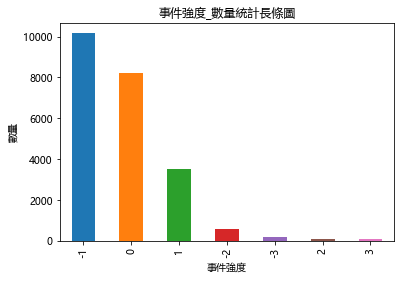

In [21]:
plt.title("事件強度_數量統計長條圖")
plt.xlabel("事件強度")
plt.ylabel("數量")
df.iloc[:,6].value_counts().plot.bar()

Text(0, 0.5, '件數')

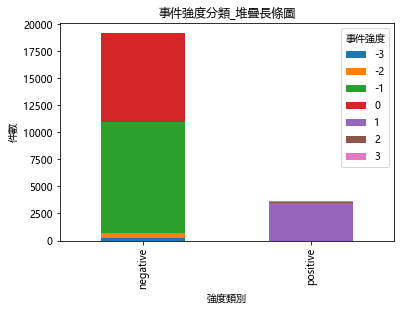

In [22]:
df.groupby('強度分類')['事件強度'].value_counts().unstack().plot.bar(stacked=True)
plt.title("事件強度分類_堆疊長條圖")
plt.xlabel("強度類別")
plt.ylabel("件數")

In [23]:
positive=df[df.強度分類=="positive"]
negative=df[df.強度分類=="negative"]

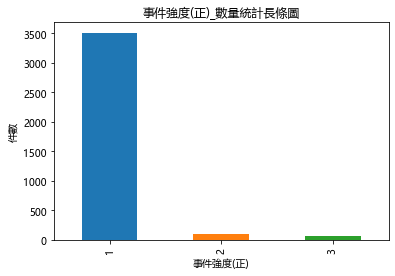

In [24]:
plt.title("事件強度(正)_數量統計長條圖")
plt.xlabel("事件強度(正)")
plt.ylabel("件數")
positive.iloc[:,6].value_counts().plot.bar()

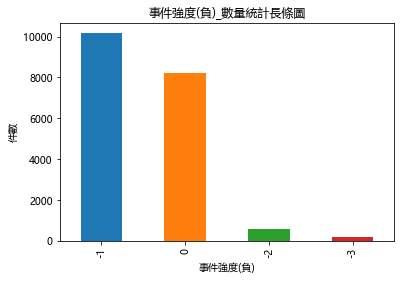

In [25]:
plt.title("事件強度(負)_數量統計長條圖")
plt.xlabel("事件強度(負)")
plt.ylabel("件數")
negative.iloc[:,6].value_counts().plot.bar()

Text(0, 0.5, '件數')

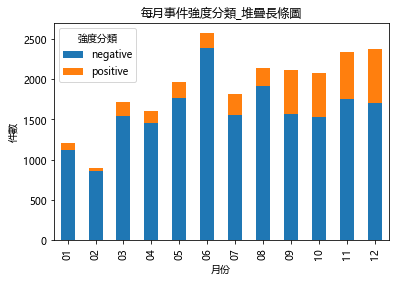

In [26]:
df.groupby('Month')['強度分類'].value_counts().unstack().plot.bar(stacked=True)
plt.title("每月事件強度分類_堆疊長條圖")
plt.xlabel("月份")
plt.ylabel("件數")

Text(0, 0.5, '件數')

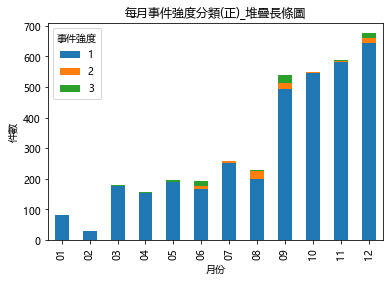

In [27]:
positive.groupby('Month')['事件強度'].value_counts().unstack().plot.bar(stacked=True)
plt.title("每月事件強度分類(正)_堆疊長條圖")
plt.xlabel("月份")
plt.ylabel("件數")

Text(0, 0.5, '件數')

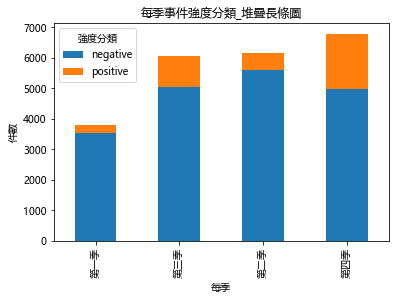

In [28]:
df.groupby('Season')['強度分類'].value_counts().unstack().plot.bar(stacked=True)
plt.title("每季事件強度分類_堆疊長條圖")
plt.xlabel("每季")
plt.ylabel("件數")

Text(0, 0.5, '件數')

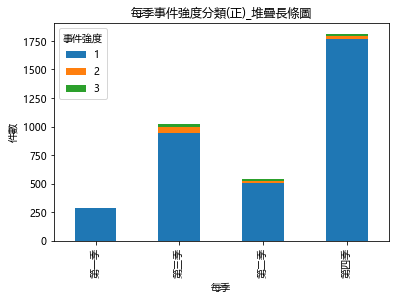

In [29]:
positive.groupby('Season')['事件強度'].value_counts().unstack().plot.bar(stacked=True)
plt.title("每季事件強度分類(正)_堆疊長條圖")
plt.xlabel("每季")
plt.ylabel("件數")

個股代號=公司簡稱，所以只做公司簡稱統計圖

In [30]:
df.公司簡稱.describe()

count             22775
unique             1959
top       台積電          
freq                164
Name: 公司簡稱, dtype: object

In [31]:
df.iloc[:,1].value_counts()

台積電               164
大同                126
鴻海                105
誠美材                81
大飲                 73
鈞泰                 72
昇華                 71
中鋼                 68
新零售                67
中華電                66
亞獅康-KY             65
長榮航                64
天剛                 63
永利聯合               61
日月光投控              53
松崗                 50
氣立                 50
德宏                 49
達能                 45
天蔥                 45
雙美                 44
台灣大                44
美時                 43
台塑                 42
燦星旅                42
大略-KY              41
富邦金                41
中信金                41
國泰金                40
華航                 40
                 ... 
康師傅-DR              1
通嘉                  1
聖馬丁-DR              1
良得電                 1
冠亞                  1
安心                  1
亞力                  1
中菲                  1
茂順                  1
第一店                 1
天仁                  1
連鋐科技                1
宜新實業                1
大甲                  1
佑華        

In [32]:
TSMC=df[df.公司簡稱=='台積電          ']

In [33]:
TSMC

,個股代號,公司簡稱,事件日,Month,Season,TCRI,事件強度,強度分類,大事件類別,小事件類別,事件內容
8,2330,台積電,20190101,01,第一季,1,-1,negative,M_經營層,MT02_董監異動,辭任1董。獨立董事湯馬斯?延吉布斯卸任。
825,2330,台積電,20190115,01,第一季,1,1,positive,I_產業前景,IP01_成本/產能變動或資本支出,"台積電以3,578 佰萬訂購機器設備，供生產用。。"
927,2330,台積電,20190118,01,第一季,1,0,negative,I_產業前景,IS01_營收變動或客戶/商品/通路策略,2018年業績寫下新高的晶圓代工龍頭台積電，對於2019年首季展望轉趨悲觀，預估營收季減幅度...
1122,2330,台積電,20190128,01,第一季,1,-1,negative,I_產業前景,IS01_營收變動或客戶/商品/通路策略,台積電澄清媒體報導，說明如下：。台積公司發現有一批化學原料有些規格誤差的問題會對良率產生影響...
1167,2330,台積電,20190129,01,第一季,1,-1,negative,I_產業前景,IS01_營收變動或客戶/商品/通路策略,1.台積電在1月19日發現F14B的12及16奈米的良率出現問題，經追查後了解問題出在一批光...
1299,2330,台積電,20190201,02,第一季,1,0,negative,I_產業前景,IP01_成本/產能變動或資本支出,"台積電以NT$2,739 佰萬元向(1) Applied Materials South E..."
1357,2330,台積電,20190211,02,第一季,1,0,negative,I_產業前景,IP01_成本/產能變動或資本支出,"台積電以5,474 佰萬元購得機器及廠務設備乙批，供生產及營運用。。"
1426,2330,台積電,20190212,02,第一季,1,-1,negative,M_經營層,MC01_勞資議題,台積電（2330）12廠江姓助理工程師未遵照公司規則，逕行將新品下機報廢，總數多達46次，讓...
1995,2330,台積電,20190221,02,第一季,1,0,negative,I_產業前景,IP01_成本/產能變動或資本支出,"台積電以NT$1,145 佰萬元訂購廠務設備乙批，供生產及營運用。。"
2080,2330,台積電,20190225,02,第一季,1,1,positive,I_產業前景,IR02_研發進程/技術合作,半導體微影技術（lithography）終於迎來全新世代交替，過去10年主導半導體關鍵製程的...


Text(0, 0.5, '件數')

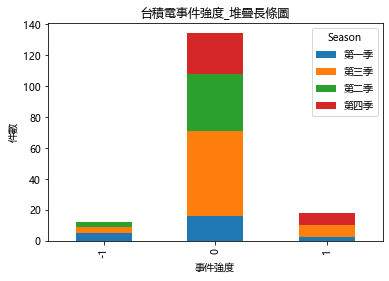

In [34]:
TSMC.groupby('事件強度')['Season'].value_counts().unstack().plot.bar(stacked=True)
plt.title("台積電事件強度_堆疊長條圖")
plt.xlabel("事件強度")
plt.ylabel("件數")

Text(0, 0.5, '件數')

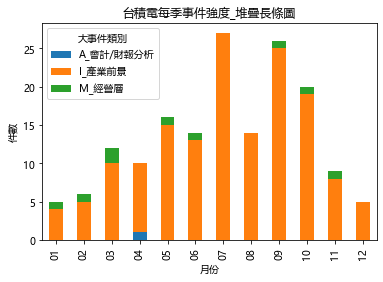

In [56]:
TSMC.groupby('Month')['大事件類別'].value_counts().unstack().plot.bar(stacked=True)
plt.title("台積電每季事件強度_堆疊長條圖")
plt.xlabel("月份")
plt.ylabel("件數")

In [92]:
company = df.公司簡稱.value_counts()
print(len(company))
for i in range(0,len(company)):
    if company[i]==1:
        print(i)
        break

1959
1903


In [141]:
a=str(company[1903:1959])
companysmall=a.split("1\n")
for i in range(0,len(companysmall)):
    companysmall[i]=companysmall[i].rstrip()
companysmall   

['加百裕',
 '東明-KY',
 '國碳科',
 '久正',
 '意德士',
 '鉅祥',
 '鑫永銓',
 '鎰勝',
 '越峰',
 '皇田',
 '新洲',
 '圓剛',
 '精聯',
 '普誠',
 '松和',
 '湧盛',
 '明輝-DR',
 '亨泰光',
 '寶一',
 '立衛',
 '逸昌',
 '同方友友-DR',
 '神州-DR',
 '國眾',
 '保綠-KY',
 '利勤',
 '康師傅-DR',
 '通嘉',
 '聖馬丁-DR',
 '良得電',
 '冠亞',
 '安心',
 '亞力',
 '中菲',
 '茂順',
 '第一店',
 '天仁',
 '連鋐科技',
 '宜新實業',
 '大甲',
 '佑華',
 '創源',
 '地球',
 '青鋼',
 '育富',
 '台燿',
 '超豐',
 '群翊',
 '運錩',
 '勁豐',
 '立誠',
 '雙邦',
 '廣宇',
 '松翰',
 '歐格',
 '志豐',
 'Name: 公司簡稱, dtype: int64']

大事件類別

Text(0, 0.5, '件數')

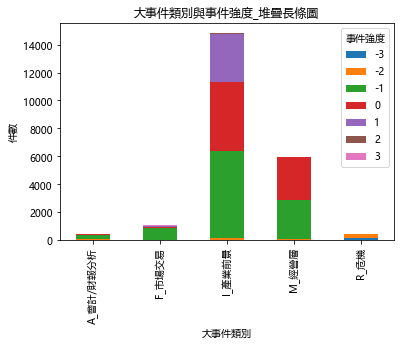

In [56]:
df.groupby('大事件類別')['事件強度'].value_counts().unstack().plot.bar(stacked=True)
plt.title("大事件類別與事件強度_堆疊長條圖")
plt.xlabel("大事件類別")
plt.ylabel("件數")

In [65]:
positive.groupby('事件強度')['大事件類別'].value_counts()

事件強度  大事件類別    
1     I_產業前景       3478
      F_市場交易         18
      M_經營層           9
      A_會計/財報分析       2
2     F_市場交易         53
      I_產業前景         41
3     F_市場交易         71
      I_產業前景          2
Name: 大事件類別, dtype: int64

Text(0, 0.5, '件數')

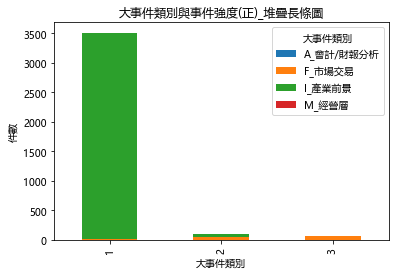

In [66]:
positive.groupby('事件強度')['大事件類別'].value_counts().unstack().plot.bar(stacked=True)
plt.title("大事件類別與事件強度(正)_堆疊長條圖")
plt.xlabel("大事件類別")
plt.ylabel("件數")

In [64]:
negative.groupby('事件強度')['大事件類別'].value_counts()

事件強度  大事件類別    
-3    R_危機          170
      A_會計/財報分析      10
      I_產業前景         10
      M_經營層           3
-2    R_危機          247
      I_產業前景        137
      A_會計/財報分析      96
      M_經營層          64
      F_市場交易          4
-1    I_產業前景       6241
      M_經營層        2817
      F_市場交易        864
      A_會計/財報分析     234
 0    I_產業前景       4927
      M_經營層        3065
      A_會計/財報分析     118
      F_市場交易         91
      R_危機            3
Name: 大事件類別, dtype: int64

Text(0, 0.5, '件數')

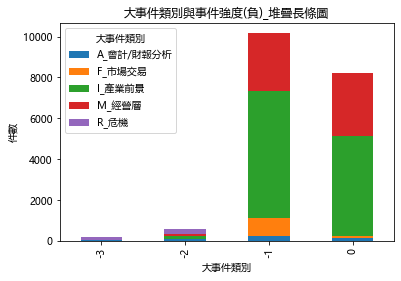

In [67]:
negative.groupby('事件強度')['大事件類別'].value_counts().unstack().plot.bar(stacked=True)
plt.title("大事件類別與事件強度(負)_堆疊長條圖")
plt.xlabel("大事件類別")
plt.ylabel("件數")

TCRI

Text(0, 0.5, '件數')

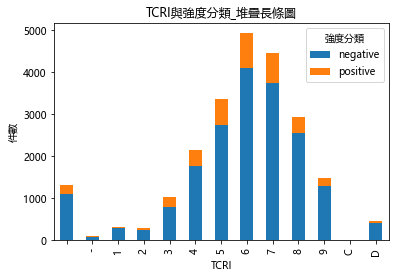

In [71]:
df.groupby('TCRI')['強度分類'].value_counts().unstack().plot.bar(stacked=True)
plt.title("TCRI與強度分類_堆疊長條圖")
plt.xlabel("TCRI")
plt.ylabel("件數")

Text(0, 0.5, '件數')

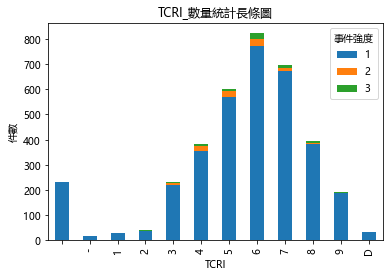

In [74]:
positive.groupby('TCRI')['事件強度'].value_counts().unstack().plot.bar(stacked=True)
plt.title("TCRI事件強度_堆疊長條圖")
plt.xlabel("TCRI")
plt.ylabel("件數")

In [32]:
import jieba
import jieba.analyse
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.font_manager import FontProperties
from wordcloud import WordCloud
myfont = FontProperties(fname=os.path.join('D:/Anaconda/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/msj.ttf'))

In [33]:
def cut(text):
    tags = jieba.analyse.extract_tags(text)
    tags = " ".join(tags)
    return tags
old=str(" ")
for i in range(0,len(df)): 
    new=cut(df.iloc[i,7])
    old=old+str(new)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 0.754 seconds.
Prefix dict has been built succesfully.


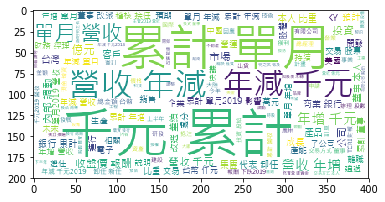

In [34]:
my_wordcloud = WordCloud(background_color='white',font_path='D:/Anaconda/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/msj.ttf').generate(old)
plt.imshow(my_wordcloud)
plt.axis('on')
plt.show()